In [1]:
import pandas as pd
df = pd.read_csv('Bitext_Sample_Customer_Service_Training_Dataset.csv')
df.head()

,flags,utterance,category,intent
0,BM,I have problems with canceling an order,ORDER,cancel_order
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order
2,B,I need help with canceling the last order,ORDER,cancel_order
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order
4,B,problem with cancelling an order I made,ORDER,cancel_order


In [2]:
df.isnull().sum()

flags        0
utterance    0
category     0
intent       0
dtype: int64

In [3]:
df['flags'].unique()

array(['BM', 'BIM', 'B', 'BIP', 'BI', 'BE', 'BIMP', 'BP', 'BEM', 'BK',
       'BEP', 'BMP', 'BL', 'BLQ', 'BLQZ', 'BIL', 'BCILQZ', 'BLM', 'BELQ',
       'BCILQ', 'BLZ', 'BILQ', 'BKL', 'BLMQW', 'BLMQ', 'BEL', 'BKM',
       'BELZ', 'BELQZ', 'BLW', 'BLQW', 'BCLQ', 'BILWZ', 'BCIQ', 'BCEILMQ',
       'BLMQZ', 'BCILMQZ', 'BLMW', 'BILM', 'BLMZ', 'BILMQ', 'BILZ',
       'BILQZ', 'BILQW', 'BIQ', 'BEMP', 'BCELMQ', 'BCILMQ', 'BILMZ',
       'BELMQ', 'BCEIQ', 'BELMQZ', 'BCELZ', 'BELM', 'BCEILM', 'BCELMZ',
       'BCELMQWZ', 'BMQ', 'BELQW', 'BQZ', 'BCEILZ', 'BELMZ', 'BCELMQZ',
       'BILMQW', 'BCLMQ', 'BCL', 'BQ', 'BILW', 'BIQZ', 'BCLZ', 'BCIL',
       'BCELQ', 'BCELQZ', 'BILP', 'BCEILQ', 'BLPQ', 'BLP', 'BCEL',
       'BCLQZ', 'BILPQ', 'BCLQW', 'BKLZ', 'BCIZ', 'BELWZ', 'BCELQWZ',
       'BCEILQZ', 'BZ', 'BCEIL', 'BCLQWZ', 'BIMQ', 'BEQZ', 'BCILM',
       'BCLMQWZ', 'BCLM', 'BKLMZ', 'BILMQZ', 'BCLMZ', 'BCILZ', 'BKLQ',
       'BKLM', 'BLQWZ', 'BCILPQZ', 'BCLW', 'BEQ', 'BIPQ', 'BKQ', 'BIQWZ',
       'B

In [4]:
df['category'].unique()

array(['ORDER', 'SHIPPING_ADDRESS', 'CANCELLATION_FEE', 'INVOICE',
       'PAYMENT', 'REFUND', 'FEEDBACK', 'CONTACT', 'ACCOUNT', 'DELIVERY',
       'NEWSLETTER'], dtype=object)

In [5]:
df['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

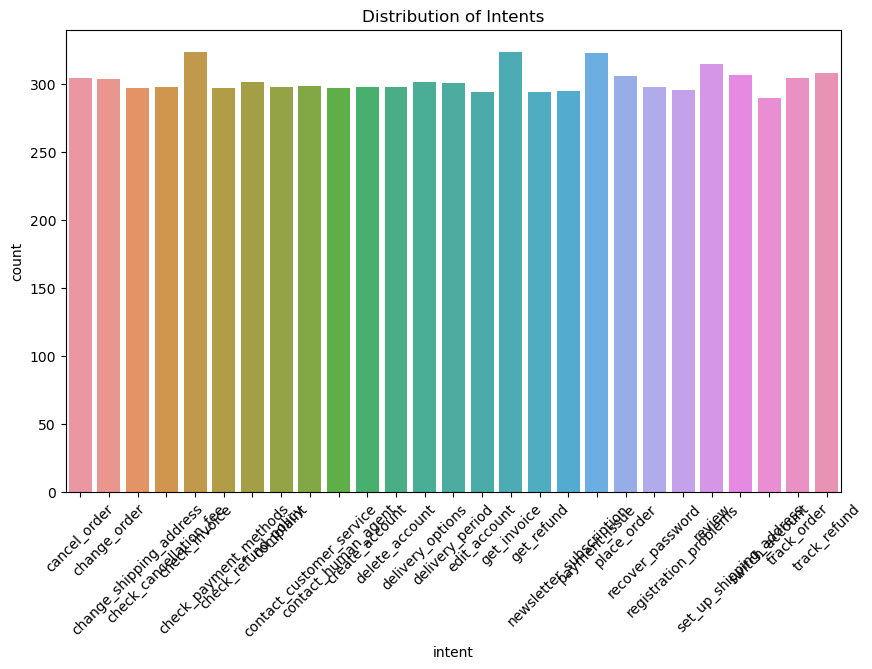

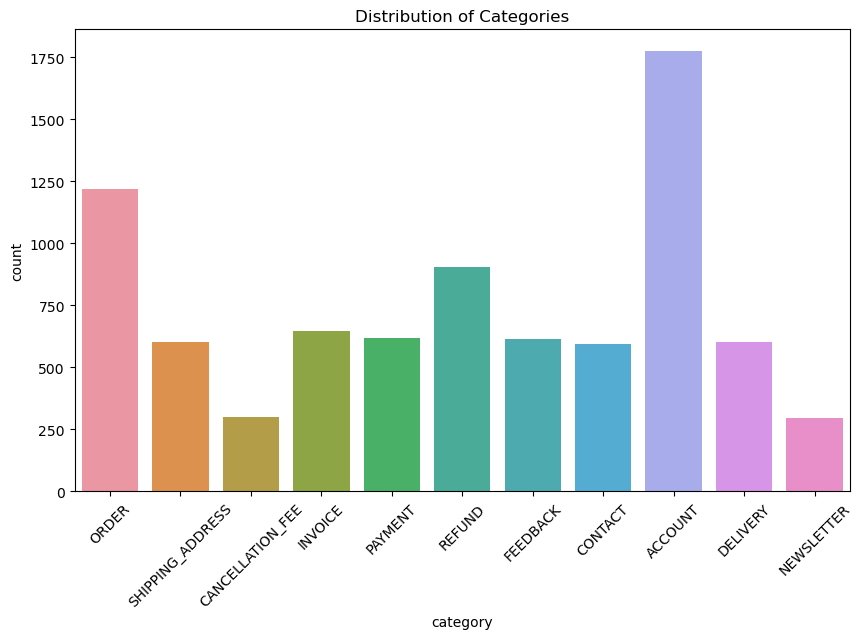

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot of distribution of 'intent'
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='intent')
plt.title('Distribution of Intents')
plt.xticks(rotation=45)
plt.show()

# Plot of distribution of 'category'
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

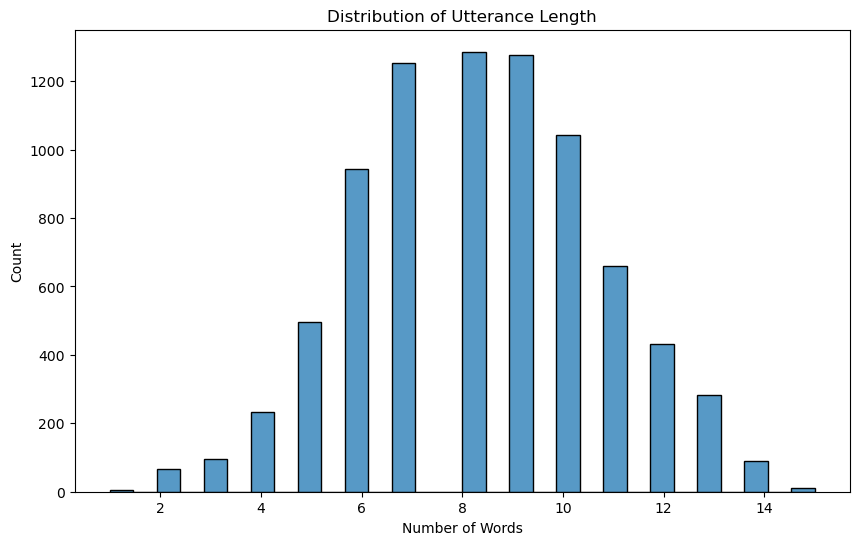

In [7]:
df['utterance_length'] = df['utterance'].apply(lambda x: len(x.split()))

# Plot of distribution of utterance length
plt.figure(figsize=(10,6))
sns.histplot(df['utterance_length'], bins=30)
plt.title('Distribution of Utterance Length')
plt.xlabel('Number of Words')
plt.show()

In [8]:
df['utterance_length'].describe()

count    8175.000000
mean        8.323914
std         2.386044
min         1.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        15.000000
Name: utterance_length, dtype: float64

In [9]:
df['flags'].value_counts()

flags
B          2395
BI         1066
BM          803
BIP         605
BL          432
           ... 
BCLMQWZ       1
BCLM          1
BCLMQ         1
BCLMZ         1
BLWZ          1
Name: count, Length: 118, dtype: int64

In [10]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_text(text):
    text = re.sub(r'\W', ' ', text) # Removes special characters
    text = re.sub(r'\s+', ' ', text) # Removes extra spaces
    return text.lower()

df['utterance'] = df['utterance'].apply(clean_text)

In [11]:
df

,flags,utterance,category,intent,utterance_length
0,BM,i have problems with canceling an order,ORDER,cancel_order,7
1,BIM,how can i find information about canceling ord...,ORDER,cancel_order,8
2,B,i need help with canceling the last order,ORDER,cancel_order,8
3,BIP,could you help me cancelling the last order i ...,ORDER,cancel_order,10
4,B,problem with cancelling an order i made,ORDER,cancel_order,7
...,...,...,...,...,...
8170,BM,i need help to check if there is any updates o...,REFUND,track_refund,13
8171,BK,refund status,REFUND,track_refund,2
8172,BI,how can i check the status of the refund,REFUND,track_refund,9
8173,B,help checking if there is anything wrong with ...,REFUND,track_refund,10


In [28]:
X = df['utterance']
y = df['intent'] 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

joblib.dump(model, 'chatbot_model/model.pkl')
joblib.dump(tfidf, 'chatbot_model/tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'chatbot_model/label_encoder.pkl')

print("Model, TF-IDF, and Label Encoder have been saved.")

Accuracy: 0.9914373088685016
Model, TF-IDF, and Label Encoder have been saved.


In [31]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9914373088685016


In [36]:
import os

os.makedirs('chatbot_model', exist_ok=True)

In [16]:
import joblib

joblib.dump(model, 'chatbot_model/model.pkl')


['chatbot_model/model.pkl']

In [17]:
from google.cloud import dialogflow_v2 as dialogflow
import os

In [18]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "D:\\downloads\\fiery-tribute-436210-f7-4781dc2531a7.json"

In [19]:
import joblib
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

joblib.dump(label_encoder, 'chatbot_model/label_encoder.pkl')

joblib.dump(model, 'chatbot_model/model.pkl')

['chatbot_model/model.pkl']

In [20]:
import joblib

model = joblib.load('chatbot_model/model.pkl')
label_encoder = joblib.load('chatbot_model/label_encoder.pkl')


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib

vectorizer = CountVectorizer()  
joblib.dump(vectorizer, 'chatbot_model/vectorizer.pkl')

['chatbot_model/vectorizer.pkl']

In [23]:
def predict_intent(input_text):
    input_text_tfidf = vectorizer.transform([input_text])  # Vectorize the input text

    input_text_reshaped = input_text_tfidf.reshape(1, -1)

    predicted_intent_numeric = model.predict(input_text_reshaped)[0]

    predicted_intent = label_encoder.inverse_transform([predicted_intent_numeric])[0]

    return predicted_intent
